In [2]:
# Following along with this post: https://blog.keras.io/building-autoencoders-in-keras.html

from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32 # 32 floats -> Compression of factor 24.5, assuming the input is 784 floats
# This is our input placeholder
input_img = Input(shape=(784,))
# 'encoded' is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# 'decoded' is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Lets also create a seperate encoder model 
# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# And a decoder model 
# Create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


Instructions for updating:
Colocations handled automatically by placer.


In [3]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 135s 12us/step


In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.3643 - val_loss: 0.2716
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2647 - val_loss: 0.2543
Epoch 3/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.2450 - val_loss: 0.2339
Epoch 4/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.2263 - val_loss: 0.2159
Epoch 5/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.2099 - val_loss: 0.2018
Epoch 6/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.1979 - val_loss: 0.1915
Epoch 7/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1888 - val_loss: 0.1833
Epoch 8/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1815 - val_loss: 0.1768
Epoch 9/50
60000/60000 [==============================] - 2s 2

In [7]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

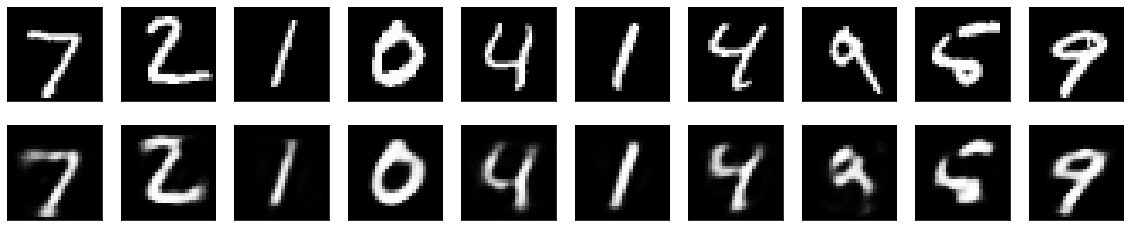

In [9]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()